<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/5%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%EB%94%AE%EB%9F%AC%EB%8B%9D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


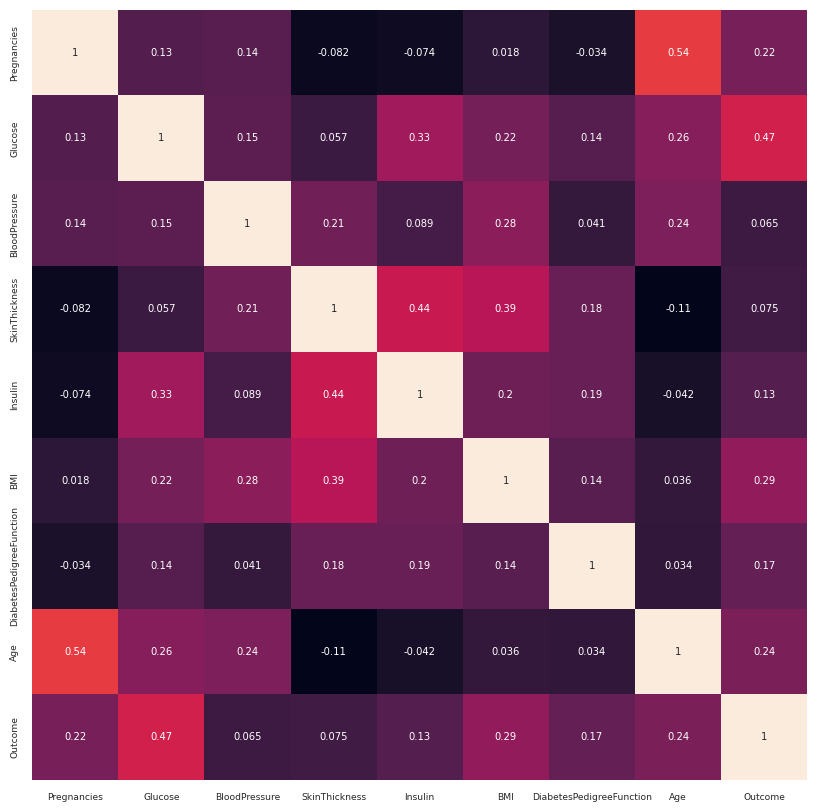

In [34]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음 (음의 상관관계도 기억하자)
#양은 a가 +면 b가 +고 음은 그 반대다.

df_corr=df.corr()

#히트맵 그리는 코드
plt.figure(figsize=(10,10))
sns.set(font_scale=0.6)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [37]:
y = df['BMI']
y.head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


In [38]:
#원 핫 인코딩
#Y = pd.get_dummies(y).values
#회귀 문제에서 원한 인코딩을 할경우 맨 아래 테스트 테이터의 손실과 mse는 약 10.-으로 나왔다.
#원 핫 인코딩은 BMI가 10.1, 10.0이면 이를 별개의 존재로 보게 하기에 성능을 더 떨어뜨릴 수 있다.

In [39]:
X = X.values

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 482.9936 - mse: 482.9936 - val_loss: 14.2254 - val_mse: 14.2254
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.1870 - mse: 12.1870 - val_loss: 4.9356 - val_mse: 4.9356
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9080 - mse: 3.9080 - val_loss: 3.0032 - val_mse: 3.0032
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2889 - mse: 4.2889 - val_loss: 1.1825 - val_mse: 1.1825
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6663 - mse: 3.6663 - val_loss: 0.8160 - val_mse: 0.8160
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4789 - mse: 4.4789 - val_loss: 4.7400 - val_mse: 4.7400
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0380 - mse: 2.0380 - val_loss: 0.5192 - val_mse: 0.5192
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3944 - mse: 1.3944 - val_loss: 2.8708 - val_mse: 2.8708
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.83

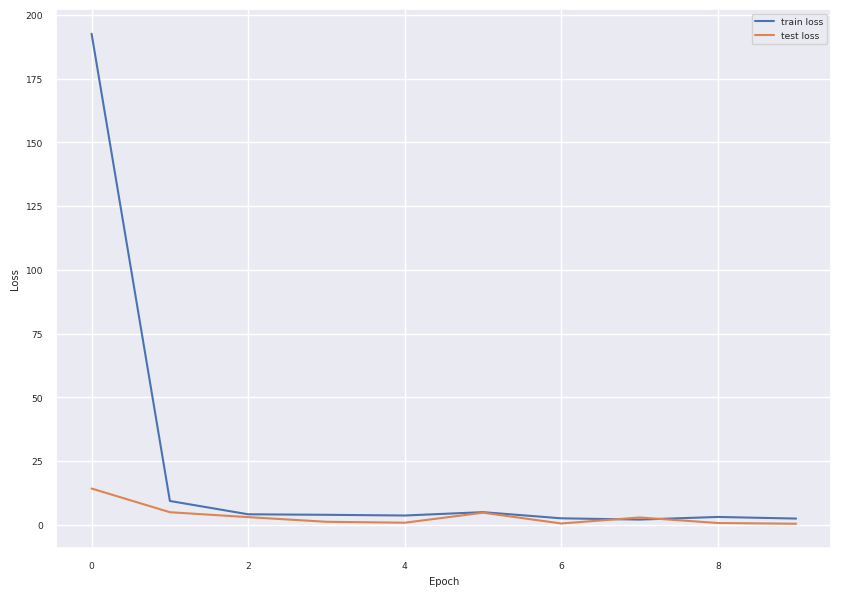

In [43]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
#테스트 함수에 대입하는 과정
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3529 - mse: 0.3529


[0.4095556437969208, 0.4095556437969208]